In [41]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [42]:
df=pd.read_csv('weight-height.csv')
df.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [43]:
df.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


C:\Users\PushkarJaiswal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Count'>

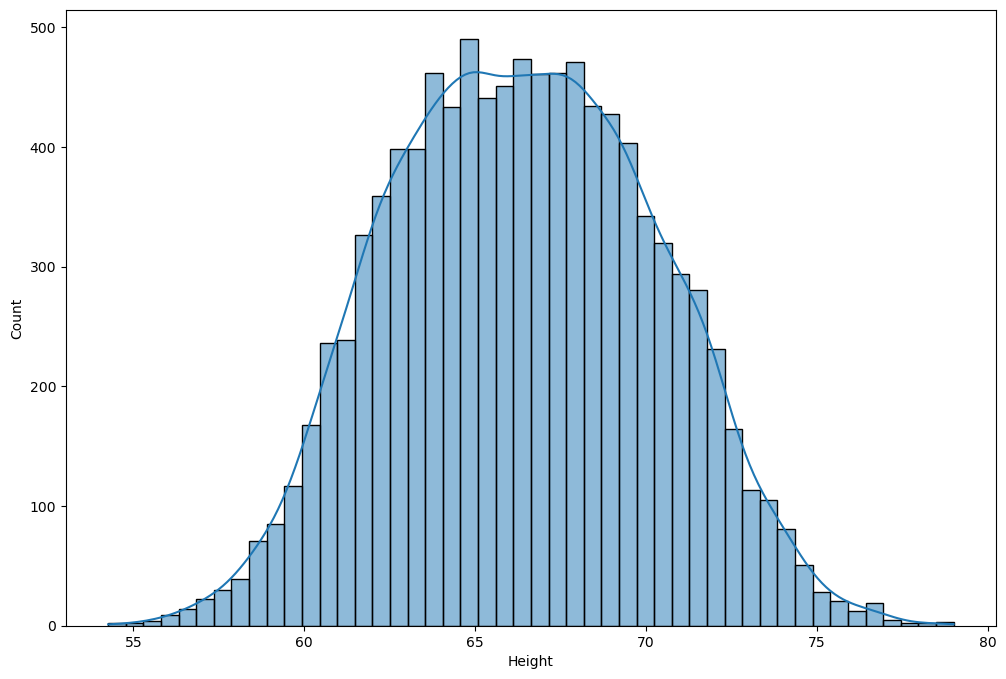

In [44]:
sns.histplot(df.Height,kde=True)

In [45]:
mean=df.Height.mean()
mean

66.367559754866

In [46]:
std=df.Height.std()
std

3.847528120795573

In [47]:
mean-3*std

54.824975392479274

In [48]:
mean+3*std

77.91014411725271

In [49]:
df[df.Height<54.82]

,Gender,Height
6624,Female,54.616858
9285,Female,54.263133


In [50]:
#Exercise

In [51]:
df1=pd.read_excel('Bhp.xlsx')

In [52]:
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250


##### We will quickly examine price_per_sqft column to check min,max,mean and percentile values



In [53]:
df1.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

##### Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

##### Also <B>plot histogram</B> to see how is the data distribution



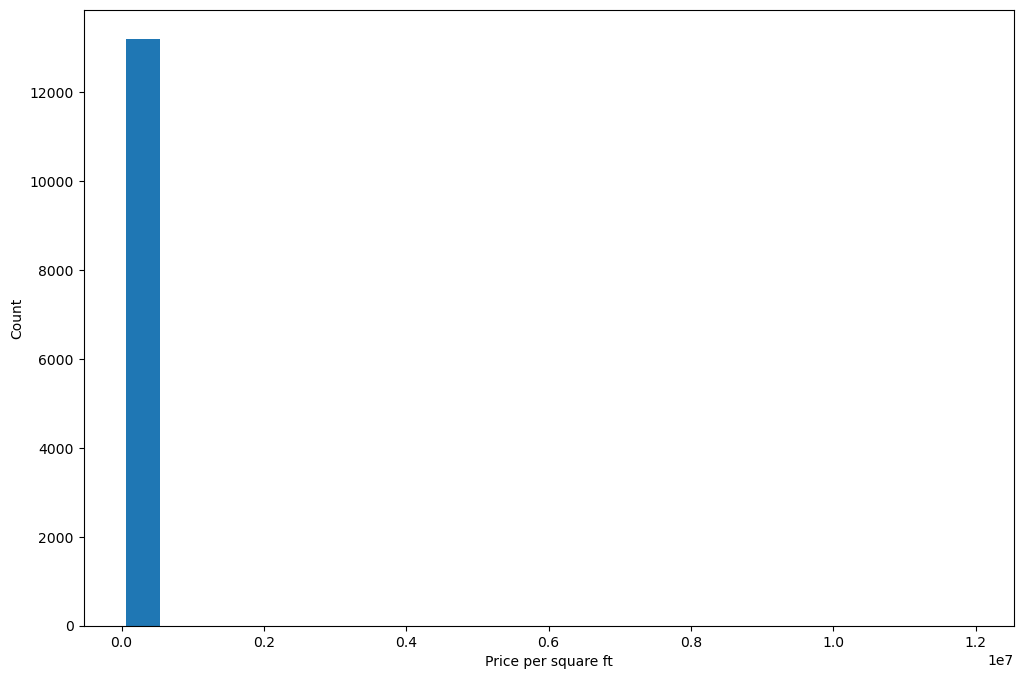

In [54]:
plt.hist(df1.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

##### Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

##### Using <b>log scale</b> can make visualization little better



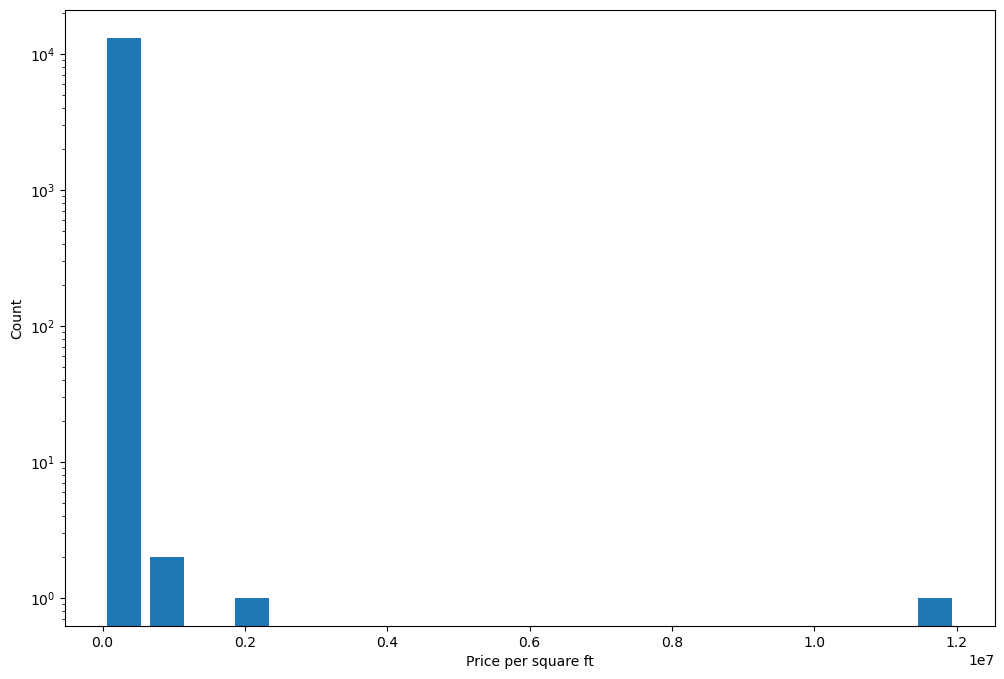

In [55]:
plt.hist(df1.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

##### You see atleast few bars on right hand side of our highest building at least :)



#### (1) Treat outliers using percentile first

In [57]:
lower_limit,upper_limit=df1.price_per_sqft.quantile([0.001,0.999])
lower_limit,upper_limit

(1366.184, 50959.36200000098)

In [58]:
outliers=df1[(df1.price_per_sqft < lower_limit) | (df1.price_per_sqft > upper_limit)]
outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3,130.0,3,371
798,other,4 Bedroom,10961.0,4,80.0,4,729
1005,other,1 BHK,15.0,1,30.0,1,200000
1106,other,5 Bedroom,24.0,2,150.0,5,625000
1867,other,3 Bedroom,52272.0,2,140.0,3,267
2392,other,4 Bedroom,2000.0,3,25.0,4,1250
3934,other,1 BHK,1500.0,1,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4,120.0,4,12000000
4924,other,7 BHK,5.0,7,115.0,7,2300000


##### Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [60]:
df2=df1[(df1.price_per_sqft > lower_limit) & (df1.price_per_sqft < upper_limit)]
df2.shape

(13172, 7)

In [61]:
df1.shape

(13200, 7)

In [62]:
df1.shape[0] - df2.shape[0]

28

##### We removed total 28 outliers



#### (2) Now remove outliers using 4 standard deviation


In [67]:
max_limit=df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit=df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()

max_limit,min_limit

(23227.73653589429, -9900.429065502549)

In [68]:
df2[(df2.price_per_sqft < min_limit) | (df2.price_per_sqft > max_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13013,other,4 Bedroom,1200.0,5,350.0,4,29166
12948,other,10 Bedroom,7150.0,13,3600.0,10,50349
7643,other,4 BHK,5422.0,6,1900.0,4,35042
733,Cunningham Road,4 BHK,5270.0,4,1250.0,4,23719
6135,other,3 Bedroom,4273.0,3,1100.0,3,25743
13185,Hulimavu,1 BHK,500.0,1,220.0,1,44000
6709,Malleshwaram,4 Bedroom,4000.0,4,1100.0,4,27500
4555,Judicial Layout,6 Bedroom,1200.0,6,300.0,6,25000
9791,other,4 Bedroom,1200.0,5,325.0,4,27083
12636,OMBR Layout,5 Bedroom,600.0,3,140.0,5,23333


In [69]:
df3=df2[(df2.price_per_sqft > min_limit) & (df2.price_per_sqft < max_limit)]
df3.shape

(13047, 7)

In [70]:
df2.shape[0]-df3.shape[0]


125

##### In this step we removed total 125 outliers



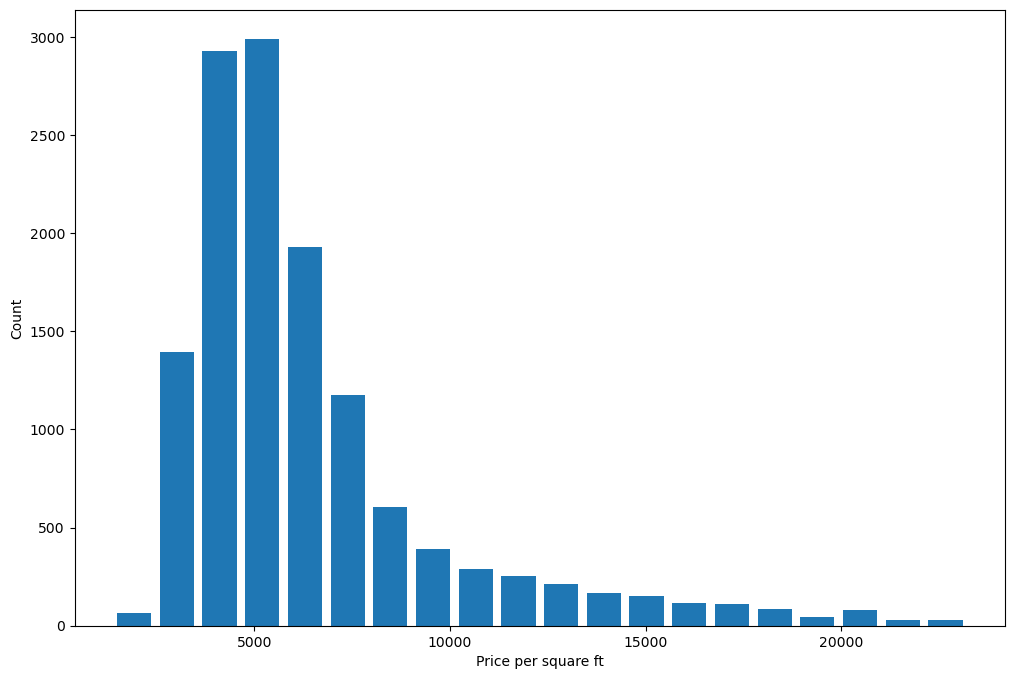

In [71]:
plt.hist(df3.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

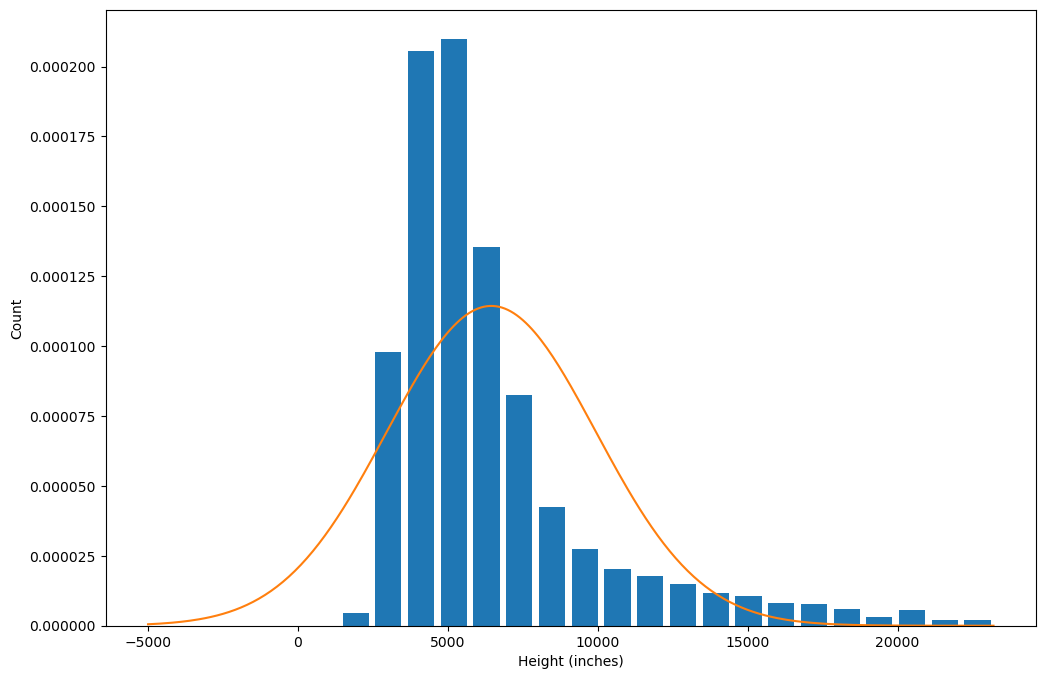

In [72]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

#### (3) Now remove outliers using z score. Use z score of 4 as your thresold


In [73]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\PushkarJaiswal\AppData\Local\Temp\ipykernel_24260\722868599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
5007,Mico Layout,2 BHK,1125.0,2,40.00,2,3555,-0.750697
3249,Bommasandra,2 BHK,920.0,2,37.46,2,4071,-0.626091
11096,Ananth Nagar,2 BHK,992.0,2,24.80,2,2500,-1.005466
3362,Bannerghatta Road,2 BHK,1218.0,2,73.00,2,5993,-0.161954
8439,Varthur Road,2 BHK,1033.0,2,32.00,2,3097,-0.861298
322,Giri Nagar,4 Bedroom,2400.0,4,400.00,4,16666,2.415430
5263,Sanjay nagar,2 BHK,1575.0,2,90.00,2,5714,-0.229328
9746,Chandapura,2 BHK,1025.0,2,27.68,2,2700,-0.957168
1022,other,2 BHK,1209.0,2,50.00,2,4135,-0.610635
1696,Electronic City Phase II,3 BHK,1320.0,2,38.13,3,2888,-0.911769


In [74]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [75]:
outliers_z.sample(5)


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
6744,HAL 2nd Stage,2 Bedroom,600.0,3,145.0,2,24166,4.226578
8157,other,4 BHK,2230.0,4,792.0,4,35515,6.967206
3136,other,4 Bedroom,1200.0,4,350.0,4,29166,5.434010
7908,HAL 2nd Stage,7 Bedroom,1000.0,7,250.0,7,25000,4.427977
1659,Whitefield,5 Bedroom,3250.0,5,900.0,5,27692,5.078059


In [76]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [77]:
df2.shape[0] - df4.shape[0]


125

##### In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation